<a href="https://colab.research.google.com/github/janaeam/food-sales-predictions/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting to Know My Data



In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


filename = '/content/drive/MyDrive/Coding Dojo/Project 1/sales_predictions.csv'
sales = pd.read_csv(filename)

In [4]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Are the dtypes consistent with the presumed column category

sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Which columns have missing values?

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Weight and Outlet_Size columns are both missing data

I will explore further below

# Checking each column for unique value counts

In [7]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
sales.loc[ : , 'Item_Fat_Content'].replace( {'LF' : 'Low Fat',
                                            'low fat' : 'Low Fat',
                                             'reg' : 'Regular'}, inplace=True)

In [9]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
sales['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCY18     9
FDO19     9
FDX20     9
         ..
FDK57     1
DRF48     1
FDT35     1
FDQ60     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
sales['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [12]:
sales['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [13]:
sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [15]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Columns to Drop

I will drop only the "Item_Visibility" column for now. Initially I thought this column would prove to be useful in predicting sales baased on the visibility of each individual product, however, since the lowest visibility products, including those with zero visibility, account for the majority of the dataset (77%). There is no need to qualify this coulumn's data values beecause it is irrelevent. 
Also, the products with the highest visibiilty, both above .3 and .2, account for only 1.4%, further proving this column's irrelevance.

#### It is my belief that we can assume the product's visibility value has very little to do with it's sale value.

In [20]:
vis_filter = sales['Item_Visibility'].count()
vis_filter1 = (sales['Item_Visibility'] >= .0) & (sales['Item_Visibility'] < .1)
vis_filter2 = (sales['Item_Visibility'] >= .1) & (sales['Item_Visibility'] < .2)
vis_filter3 = (sales['Item_Visibility'] >= .2) & (sales['Item_Visibility'] < .3)
vis_filter4 = sales['Item_Visibility'] >= .3

vis_count1 = sales.loc[vis_filter1, 'Item_Visibility'].count()
vis_count2 = sales.loc[vis_filter2, 'Item_Visibility'].count()
vis_count3 = sales.loc[vis_filter3, 'Item_Visibility'].count()
vis_count4 = sales.loc[vis_filter4, 'Item_Visibility'].count()

print(vis_count1)
print(round(vis_count1/vis_filter, 2))
print(vis_count2)
print(round(vis_count2/vis_filter, 2))
print(vis_count3)
print(round(vis_count3/vis_filter, 3))
print(vis_count4)
print(round(vis_count4/vis_filter, 4))

6593
0.77
1796
0.21
122
0.014
12
0.0014


In [21]:
sales.drop(columns = 'Item_Visibility', inplace = True)

## Exploring the relevance of missing data in the Item_Weight and Outlet_Size columns



---

----- First... look at Outlet_Size column

In [22]:
outlet_missing = sales['Outlet_Size'].isna()
sales.loc[outlet_missing, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [23]:
sales[outlet_missing].shape

(2410, 11)

In [24]:
# Checking value counts with the outlet_missing filter on the Outlet_Identifier column to see how 
# the missing Outlet_Size values compare to the Outlet_Identifier value counts already checked above

sales.loc[outlet_missing, 'Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [25]:
# Checking how the Outlet_Type and Outlet_Identifier columns compare together with the missing
# values from the Outlet_Size column

sales.loc[outlet_missing, ['Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type']].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Establishment_Year  Outlet_Location_Type
OUT045             Supermarket Type1  2002                       Tier 2                  929
OUT017             Supermarket Type1  2007                       Tier 2                  926
OUT010             Grocery Store      1998                       Tier 3                  555
dtype: int64

#### In the above cell where the value counts for the Outlet_Type column "Supermarket Type1" accounted for 5577 cells I will check to see if all the other Outlet_Type rows with "Supermarket Type1" contain a consistent Outlet_Size as this will allow me to see what the Outlet_Size values should be.

In [26]:
# Checking value counts with the outlet_missing filter on the Outlet_Type column to see how 
# the missing Outlet_Size values compare to the Outlet_Type value counts already checked above

print(sales.loc[outlet_missing, 'Outlet_Type'].value_counts())
print(sales.loc[outlet_missing, 'Outlet_Establishment_Year'].value_counts()) #All Years correspond with missing values
print(sales.loc[outlet_missing, 'Outlet_Location_Type'].value_counts()) #Tier 3 = 555 (same as Grocery and OUT010 and 1998)
print(sales.loc[outlet_missing, 'Item_Outlet_Sales'].value_counts().sort_values())
print(sales.loc[outlet_missing, 'Item_Outlet_Sales'].max())

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64
2002    929
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64
Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64
95.8752      1
237.6906     1
8760.5964    1
2366.9190    1
2646.5550    1
            ..
2302.3364    5
1230.3984    6
1225.0720    6
958.7520     6
838.9080     7
Name: Item_Outlet_Sales, Length: 1627, dtype: int64
9664.7528


In [27]:
# there's no clear correlation between location tier and store size
tier1_filter = sales['Outlet_Location_Type'] == 'Tier 1'
tier2_filter = sales['Outlet_Location_Type'] == 'Tier 2'
tier3_filter = sales['Outlet_Location_Type'] == 'Tier 3'

print(sales.loc[tier1_filter, 'Outlet_Size'].value_counts())
print(sales.loc[tier2_filter, 'Outlet_Size'].value_counts())
print(sales.loc[tier3_filter, 'Outlet_Size'].value_counts())

Small     1458
Medium     930
Name: Outlet_Size, dtype: int64
Small    930
Name: Outlet_Size, dtype: int64
Medium    1863
High       932
Name: Outlet_Size, dtype: int64


In [28]:
# These 3 years only correlate with the missing values ... no evidence of store size imputation

year98est_filter = sales['Outlet_Establishment_Year'] == 1998
year02est_filter = sales['Outlet_Establishment_Year'] == 2002
year07est_filter = sales['Outlet_Establishment_Year'] == 2007

print(sales.loc[year98est_filter, 'Outlet_Size'].value_counts())
print(sales.loc[year02est_filter, 'Outlet_Size'].value_counts())
print(sales.loc[year07est_filter, 'Outlet_Size'].value_counts())

Series([], Name: Outlet_Size, dtype: int64)
Series([], Name: Outlet_Size, dtype: int64)
Series([], Name: Outlet_Size, dtype: int64)


In [29]:
# Grocery Store is only listed as Small. All other rows that contain 'Grocery Store' show NAN for the Outlet Size 

sup1Type_filter = sales['Outlet_Type'] == 'Supermarket Type1'
grocType_filter = sales['Outlet_Type'] == 'Grocery Store'

print(sales.loc[sup1Type_filter, 'Outlet_Size'].value_counts())
print(sales.loc[grocType_filter, 'Outlet_Size'].value_counts())

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64
Small    528
Name: Outlet_Size, dtype: int64


In [30]:
# All rows containing OUT010, 1998 and Grocery Store occupy the same 555 rows.
# These 555 rows are missing a value for Outlet Size and are all in location Tier 3.
# I believe that since the only other mention of Grocery is small and that Tier 3 is 

sales.loc[outlet_missing & tier3_filter, [ 'Outlet_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']]

,Outlet_Type,Outlet_Identifier,Outlet_Establishment_Year
3,Grocery Store,OUT010,1998
28,Grocery Store,OUT010,1998
30,Grocery Store,OUT010,1998
45,Grocery Store,OUT010,1998
65,Grocery Store,OUT010,1998
...,...,...,...
8400,Grocery Store,OUT010,1998
8432,Grocery Store,OUT010,1998
8473,Grocery Store,OUT010,1998
8486,Grocery Store,OUT010,1998


In [31]:
# Without further exploring the Item Sales agaisnt other information there is no clear correlation
# between the item sales and Outlet Size

size = sales['Outlet_Size'] == 'Small'

itSales1_filter = sales['Item_Outlet_Sales'] <= 100
itSales2_filter = (sales['Item_Outlet_Sales'] >= 101) & (sales['Item_Outlet_Sales'] <= 200)
itSales3_filter = (sales['Item_Outlet_Sales'] >= 201) & (sales['Item_Outlet_Sales'] <= 300)
itSales4_filter = (sales['Item_Outlet_Sales'] >= 301) & (sales['Item_Outlet_Sales'] <= 400)
itSales5_filter = (sales['Item_Outlet_Sales'] >= 401) & (sales['Item_Outlet_Sales'] <= 500)
itSales6_filter = (sales['Item_Outlet_Sales'] >= 501) & (sales['Item_Outlet_Sales'] <= 600)
itSales7_filter = (sales['Item_Outlet_Sales'] >= 601) & (sales['Item_Outlet_Sales'] <= 700)
itSales8_filter = (sales['Item_Outlet_Sales'] >= 701) & (sales['Item_Outlet_Sales'] <= 800)
itSales9_filter = (sales['Item_Outlet_Sales'] >= 801) & (sales['Item_Outlet_Sales'] <= 900)
itSales10_filter = sales['Item_Outlet_Sales'] >= 901

print(sales.loc[itSales1_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales1_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales2_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales2_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales3_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales3_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales4_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales4_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales5_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales5_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales6_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales6_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales7_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales7_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales8_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales8_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales9_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales9_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales10_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales10_filter & outlet_missing, 'Item_Outlet_Sales'].count())

Small     54
Medium     3
High       1
Name: Outlet_Size, dtype: int64
66
Small     148
Medium     17
High       10
Name: Outlet_Size, dtype: int64
179
Small     107
Medium     27
High       17
Name: Outlet_Size, dtype: int64
104
Small     106
Medium     37
High       30
Name: Outlet_Size, dtype: int64
96
Small     95
Medium    52
High      15
Name: Outlet_Size, dtype: int64
92
Small     84
Medium    69
High      25
Name: Outlet_Size, dtype: int64
98
Small     70
Medium    67
High      36
Name: Outlet_Size, dtype: int64
70
Small     83
Medium    71
High      28
Name: Outlet_Size, dtype: int64
93
Medium    69
Small     67
High      21
Name: Outlet_Size, dtype: int64
76
Medium    2380
Small     1571
High       749
Name: Outlet_Size, dtype: int64
1533


In [32]:
# Further proof that Grocery Story is either listed as Small in the Outlet Size column or Nan
# There are 555 rows containing Grocery and no specification of Outlet Size
# There are 528 rows containing Grocery and Small Outlet Size

print(sales.loc[grocType_filter, 'Outlet_Type'].value_counts())
print(sales[grocType_filter & ~outlet_missing].count())

Grocery Store    1083
Name: Outlet_Type, dtype: int64
Item_Identifier              528
Item_Weight                    0
Item_Fat_Content             528
Item_Type                    528
Item_MRP                     528
Outlet_Identifier            528
Outlet_Establishment_Year    528
Outlet_Size                  528
Outlet_Location_Type         528
Outlet_Type                  528
Item_Outlet_Sales            528
dtype: int64


In [33]:
sales[grocType_filter & outlet_missing].count()

Item_Identifier              555
Item_Weight                  555
Item_Fat_Content             555
Item_Type                    555
Item_MRP                     555
Outlet_Identifier            555
Outlet_Establishment_Year    555
Outlet_Size                    0
Outlet_Location_Type         555
Outlet_Type                  555
Item_Outlet_Sales            555
dtype: int64

In [34]:
# Further proving that these Outlet Idenifier numbers are missing from the Outlet Size column
# this not help impute size for these outlet stores

OUT045_filter = sales['Outlet_Identifier'] == 'OUT045'
OUT017_filter = sales['Outlet_Identifier'] == 'OUT017'
OUT010_filter = sales['Outlet_Identifier'] == 'OUT010'

sales.loc[OUT010_filter | OUT017_filter | OUT045_filter, 'Outlet_Size'].count()

0



---

---- Second... Look at Item_Weight column


In [35]:
weight_missing = sales['Item_Weight'].isna()
sales.loc[weight_missing, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [36]:
sales[weight_missing].shape

(1463, 11)

In [37]:
sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [38]:
sales.loc[weight_missing, 'Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [39]:
sales.loc[weight_missing, :].groupby(['Item_Type','Item_Fat_Content'])[['Item_Weight','Item_MRP']].count()


Item_Weight  Item_MRP
Item_Type             Item_Fat_Content                       
Baking Goods          Low Fat                     0        67
                      Regular                     0        45
Breads                Low Fat                     0        27
                      Regular                     0        20
Breakfast             Low Fat                     0         7
                      Regular                     0        14
Canned                Low Fat                     0        55
                      Regular                     0        55
Dairy                 Low Fat                     0        64
                      Regular                     0        52
Frozen Foods          Low Fat                     0        75
                      Regular                     0        63
Fruits and Vegetables Low Fat                     0       112
                      Regular                     0       101
Hard Drinks           Low Fat                     0        31
Health and Hygiene    Low Fat                     0        90
Household             Low Fat                     0       151
Meat                  Low Fat                     0        38
                      Regular                     0        50
Others                Low Fat                     0        32
Seafood               Low Fat                     0         8
                      Regular                     0         5
Snack Foods           Low Fat                     0       127
                      Regular                     0        85
Soft Drinks           Low Fat                     0        59
                      Regular                     0        12
Starchy Foods         Low Fat                     0         8
                      Regular                     0        10

In [40]:
sales.loc[~weight_missing, :].groupby(['Item_Type','Item_Fat_Content'])[['Item_Weight','Item_MRP']].count()

Item_Weight  Item_MRP
Item_Type             Item_Fat_Content                       
Baking Goods          Low Fat                   262       262
                      Regular                   274       274
Breads                Low Fat                   113       113
                      Regular                    91        91
Breakfast             Low Fat                    34        34
                      Regular                    55        55
Canned                Low Fat                   286       286
                      Regular                   253       253
Dairy                 Low Fat                   354       354
                      Regular                   212       212
Frozen Foods          Low Fat                   375       375
                      Regular                   343       343
Fruits and Vegetables Low Fat                   518       518
                      Regular                   501       501
Hard Drinks           Low Fat                   183       183
Health and Hygiene    Low Fat                   430       430
Household             Low Fat                   759       759
Meat                  Low Fat                   132       132
                      Regular                   205       205
Others                Low Fat                   137       137
Seafood               Low Fat                    29        29
                      Regular                    22        22
Snack Foods           Low Fat                   565       565
                      Regular                   423       423
Soft Drinks           Low Fat                   315       315
                      Regular                    59        59
Starchy Foods         Low Fat                    74        74
                      Regular                    56        56

In [41]:
sales.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [42]:
sales.groupby(['Item_Type'])['Item_Weight'].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

In [43]:
print(sales.groupby(['Item_Type'])['Item_Weight'].min())

Item_Type
Baking Goods             4.880
Breads                   4.635
Breakfast                6.425
Canned                   4.615
Dairy                    4.805
Frozen Foods             4.555
Fruits and Vegetables    5.460
Hard Drinks              4.610
Health and Hygiene       5.175
Household                5.030
Meat                     5.150
Others                   5.500
Seafood                  5.365
Snack Foods              5.095
Soft Drinks              4.590
Starchy Foods            6.695
Name: Item_Weight, dtype: float64


In [44]:
sales.loc[weight_missing, 'Item_Identifier'].count()

1463

In [45]:
sales.loc[weight_missing, 'Item_Identifier'].nunique()

1142

In [46]:
sales.groupby(['Item_Type', 'Item_Identifier'])['Item_Weight'].count()

Item_Type      Item_Identifier
Baking Goods   FDA11              4
               FDA23              5
               FDA35              3
               FDA36              2
               FDA47              5
                                 ..
Starchy Foods  FDG59              5
               FDH35              5
               FDH47              6
               FDI35              3
               FDZ34              3
Name: Item_Weight, Length: 1559, dtype: int64

In [47]:
# Found 2 of the NAN values that share a Type ID with 8 others. Easy to know
# these weights are specific to this Type ID

typeID_FDW13 = sales['Item_Identifier'] == 'FDW13'

sales['Item_Weight'][typeID_FDW13].fillna(8.5)

256     8.5
1141    8.5
2190    8.5
3928    8.5
3978    8.5
6499    8.5
6587    8.5
7029    8.5
8025    8.5
8032    8.5
Name: Item_Weight, dtype: float64

I have no idea how to make these values apply. I tried renaming the dataframe, but it not work. I also tried creating a function, but I obviously still have no idea how to work with those. Either way, I will be moving on from this strategy and filling in all missing values by either creating another category or by imputing the "best fit" for that column.

In [48]:
sales['Outlet_Size'].fillna('Not Specified', inplace=True)

In [49]:
sales['Outlet_Size'].value_counts()

Medium           2793
Not Specified    2410
Small            2388
High              932
Name: Outlet_Size, dtype: int64

In [50]:
sales['Item_Weight'].fillna(0.000, inplace=True)

In [51]:
sales['Item_Weight'].value_counts()

0.000     1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
5.675        2
9.420        1
6.520        1
7.685        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [52]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Removing Unwanted Data Observations

In [53]:
# Checking for duplicates

sales.duplicated().any()

False

# Part 3

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
uniqueItems = sales.groupby(['Outlet_Establishment_Year'])['Outlet_Identifier'].nunique()

uniqueItems

Outlet_Establishment_Year
1985    2
1987    1
1997    1
1998    1
1999    1
2002    1
2004    1
2007    1
2009    1
Name: Outlet_Identifier, dtype: int64

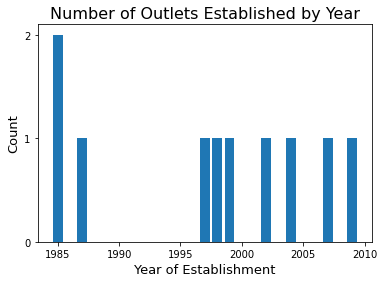

In [56]:
plt.bar(uniqueItems.index, uniqueItems.values)
plt.yticks(np.arange(3), [0, 1, 2])
plt.title('Number of Outlets Established by Year', fontsize = 16)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Year of Establishment', fontsize = 13);

In [57]:
itemsSold = sales.groupby(['Outlet_Establishment_Year', 'Outlet_Identifier'])['Item_Identifier'].nunique()

itemsSold

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT019               528
                           OUT027               935
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: Item_Identifier, dtype: int64

In [70]:
soldbyOutlet = itemsSold.index.droplevel(level=0)

soldbyOutlet

Index(['OUT019', 'OUT027', 'OUT013', 'OUT046', 'OUT010', 'OUT049', 'OUT045',
       'OUT035', 'OUT017', 'OUT018'],
      dtype='object', name='Outlet_Identifier')

In [65]:
itemsSold.values

array([528, 935, 932, 930, 555, 930, 929, 930, 926, 928])

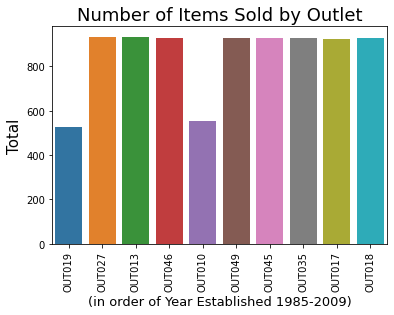

In [100]:
sns.barplot(x = soldbyOutlet, y = itemsSold.values)
plt.xticks(rotation= 90);
plt.title('Number of Items Sold by Outlet', fontsize = 18)
plt.xlabel('Outlet Identifier', fontsize = 15)
plt.xlabel('(in order of Year Established 1985-2009)', fontsize = 13)
plt.ylabel('Total', fontsize = 15);

In [61]:
salesbyLocation = sales.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

salesbyLocation

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

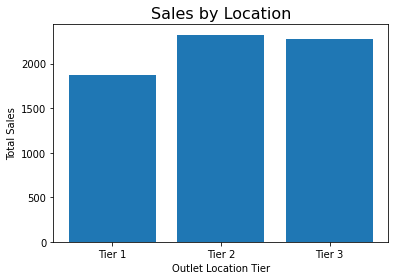

In [104]:
plt.bar(salesbyLocation.index, salesbyLocation.values);
plt.title('Sales by Location', fontsize = 16)
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales');